# Implement Simple Logistic Regression in Python Using Scikit-Learn

In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Importing Dataset and getting info

In [162]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Analysing Data

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Spliting Data into X and Y

In [164]:
X = df.iloc[:,:13]
Y = df.iloc[:,13:]

### Spliting into Train/Test

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Scaling X Data

In [166]:
scalar = StandardScaler()
X_scaled_train = scalar.fit_transform(X_train)
X_scaled_test = scalar.transform(X_test)

### Fitting the Regression Model on Training Data

In [167]:
model = LogisticRegression()
model.fit(X_train, y_train)

scaled_model = LogisticRegression()
scaled_model.fit(X_scaled_train, y_train)

c:\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

LogisticRegression()

<Axes: title={'center': 'Feature Importance'}>

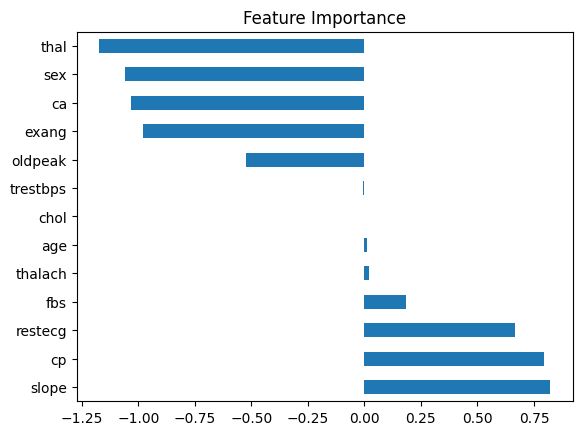

In [168]:
# Optional, calculate importance of feature after fit
importance = model.coef_[0]
feat_importances = pd.Series(importance, index = X_test.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

### Predicting and Evaluating

In [169]:
pred = model.predict(X_test)
scaled_pred = scaled_model.predict(X_scaled_test)

In [170]:
print("Accuracy without scaling:", accuracy_score(y_test, pred))
print("Accuracy with scaling:", accuracy_score(y_test, scaled_pred))

Accuracy without scaling: 0.8131868131868132
Accuracy with scaling: 0.8131868131868132


In [171]:
matrix = confusion_matrix(y_test, scaled_pred)

Text(20.72222222222222, 0.5, 'True Label')

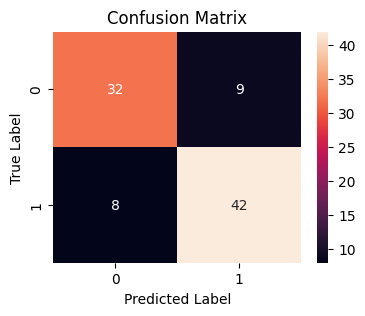

In [172]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel('True Label')

In [173]:
print(classification_report(y_test, scaled_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### Saving Model

In [174]:
filename = 'Regression_Model.sav'
pickle.dump(model, open(filename, 'wb'))

### Loading Model

In [175]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_scaled_test, y_test)
print(result)

0.7582417582417582


c:\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
